# Student Successs Predictor

### => Load the data & Understand data

In [2]:
import numpy as np
import pandas as pd

df = pd.read_excel('student_success_dataset.xlsx')
print("Sample Rows")
print(df.head())

print("Data-Set Shape")
print(f"Rows : {df.shape[0]}, \nColumns : {df.shape[1]}")
print("Data-Set Info")
print(df.info())
print("Summary Statistics")
print(df.describe(include='all'))
print("Missing Values : ", df.isnull().sum())

Sample Rows
   StudyHours  Attendance  PastScore Internet  SleepHours Passed
0           2          60         40      Yes           5     No
1           5          80         60       No           6    Yes
2           8          90         75      Yes           8    Yes
3           3          70         50      Yes           5     No
4           7          85         70       No           7    Yes
Data-Set Shape
Rows : 20, 
Columns : 6
Data-Set Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None
Summary Statistics
        StudyHours  Attendance  PastScore Interne

### => Preprocessing & Cleaning

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
 
df = pd.read_excel("student_success_dataset.xlsx")

print("Missing Values in each column")
print(df.isnull().sum()) 

le = LabelEncoder()

df['Internet'] = le.fit_transform(df['Internet'])
df['Passed'] = le.fit_transform(df['Passed'])

print("After Encoding")
print(df.head())
print("Data Types after Encoding ")
print(df.dtypes)


Missing Values in each column
StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64
After Encoding
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1
Data Types after Encoding 
StudyHours    int64
Attendance    int64
PastScore     int64
Internet      int64
SleepHours    int64
Passed        int64
dtype: object


### => Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Classifcatioon Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



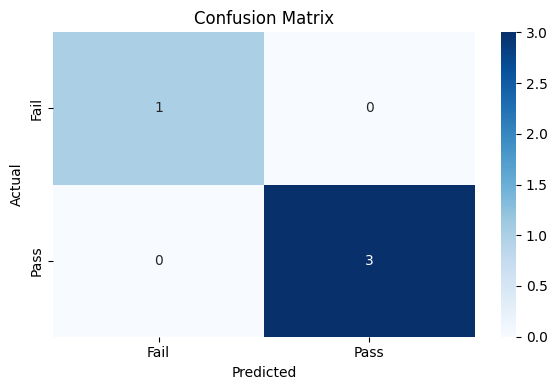

In [ ]:
features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours']
scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features] # features
Y = df_scaled['Passed'] # target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Classifcatioon Report ")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,  annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

 

In [14]:
print("------- Predict Your Result ----------")
try:
    study_hours = float(input("Enter study : "))
    attendence = float(input("Enter attendence : "))
    past_score = float(input("Enter past score : "))
    sleep_hours = float(input("Enter sleep hours : "))

    user_input_df = pd.DataFrame([{
        'StudyHours' : study_hours,
        'Attendance' : attendence,
        'PastScore' : past_score,
        'SleepHours' : sleep_hours 
    }])
    
    user_input_scaled = scaler.transform(user_input_df)

    prediction = model.predict(user_input_scaled)

    result = "Pass" if prediction == 1 else "Fail"
    print(f"Prediction Based On input : {result}")
except Exception as e:
    print("An Error Occurs.")

------- Predict Your Result ----------
Prediction Based On input : Fail


d:\mine\Python\sklearn\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
